In [1]:
import sqlite3
connection = sqlite3.connect('student_grades.db')
print("Database created and connected!")

Database created and connected!


In [2]:
cursor = connection.cursor()
print("Cursor created")

Cursor created


In [3]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')
print("student table created")

student table created


In [4]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER,
    FOREIGN KEY(student_id)
        REFERENCES students(student_id)
)
''')
connection.commit()
print('grades table created')

grades table created


In [5]:
students_data = [
    ('Jill', 'Smith'),
    ('Sarah', 'Mayer'),
    ('Kaden', 'Branch'),
    ('Colby', 'Rich'),
    ('Nicole', 'Palmer'),
]

cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

connection.commit()

print("data inserted into students table")

data inserted into students table


In [10]:
cursor.execute('DROP TABLE IF EXISTS grades;')
connection.commit()

In [11]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER,
    FOREIGN KEY(student_id)
        REFERENCES students(student_id)
)
''')
connection.commit()
print('grades table created')

grades table created


In [12]:
grades_data = [
    (1, 'Science', 92),
    (1, 'English', 80),
    (1, 'Geography', 100),
    (2, 'Science', 70),
    (2, 'English', 95),
    (2, 'Geography', 90),
    (3, 'Science', 88),
    (3, 'English', 73),
    (3, 'Geography', 91),
    (4, 'Science', 99),
    (4, 'English', 96),
    (4, 'Geography', 98),
    (5, 'Science', 89),
    (5, 'English', 87),
    (5, 'Geography', 81),
]
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)
connection.commit()

print("data inserted into grades table")

data inserted into grades table


In [13]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')
joined_data = cursor.fetchall()

for row in joined_data:
    print (row)

('Jill', 'Smith', 'Science', 92)
('Jill', 'Smith', 'English', 80)
('Jill', 'Smith', 'Geography', 100)
('Sarah', 'Mayer', 'Science', 70)
('Sarah', 'Mayer', 'English', 95)
('Sarah', 'Mayer', 'Geography', 90)
('Kaden', 'Branch', 'Science', 88)
('Kaden', 'Branch', 'English', 73)
('Kaden', 'Branch', 'Geography', 91)
('Colby', 'Rich', 'Science', 99)
('Colby', 'Rich', 'English', 96)
('Colby', 'Rich', 'Geography', 98)
('Nicole', 'Palmer', 'Science', 89)
('Nicole', 'Palmer', 'English', 87)
('Nicole', 'Palmer', 'Geography', 81)


In [18]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id, students.first_name, students.last_name
''')
average_grades = cursor.fetchall()

print('Average grade for each student:')
for first_name, last_name, average_grade in average_grades:
    print (first_name, last_name, average_grade)

Average grade for each student:
Jill Smith 90.66666666666667
Sarah Mayer 85.0
Kaden Branch 84.0
Colby Rich 97.66666666666667
Nicole Palmer 85.66666666666667


In [16]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id, students.first_name, students.last_name
ORDER BY average_grade DESC
LIMIT 1
''')
average_grades = cursor.fetchall()
print('Student with highest average:')
for first_name, last_name, average_grade in average_grades:
    print (first_name, last_name, average_grade)

Student with highest average:
Colby Rich 97.66666666666667


In [19]:
# I dont have the Math subject so I used science instead
cursor.execute('''
SELECT AVG(grade) FROM grades WHERE subject = 'Science'
''')
average_science = cursor.fetchone()[0]
print(f"Average grade for science: {average_science}")


Average grade for science: 87.6


In [20]:
cursor.execute('''
SELECT DISTINCT students.first_name, students.last_name FROM students
JOIN grades ON students.student_id = grades.student_id WHERE grades.grade > 90
''')
above_90 = cursor.fetchall()
for first_name, last_name in above_90:
    print(f"{first_name} {last_name}")

Jill Smith
Sarah Mayer
Kaden Branch
Colby Rich


In [21]:
import pandas as pd
students_df = pd.read_sql_query('SELECT * FROM students', connection)
students_df.head()

,student_id,first_name,last_name
0,1,Jill,Smith
1,2,Sarah,Mayer
2,3,Kaden,Branch
3,4,Colby,Rich
4,5,Nicole,Palmer


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['student_id'].plot(kind='hist', bins=20, title='student_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('first_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('last_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='student_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('first_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='first_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('last_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='last_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['student_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'student_id'}, axis=1)
              .sort_values('student_id', ascending=True))
  xs = counted['student_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('student_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('first_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='first_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('student_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['student_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'student_id'}, axis=1)
              .sort_values('student_id', ascending=True))
  xs = counted['student_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('student_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('last_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='last_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('student_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['student_id'].plot(kind='line', figsize=(8, 4), title='student_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['last_name'].value_counts()
    for x_label, grp in _df_11.groupby('first_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('first_name')
_ = plt.ylabel('last_name')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['first_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='first_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['last_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='last_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['first_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='student_id', y='first_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['last_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='student_id', y='last_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [22]:
grades_df = pd.read_sql_query('SELECT * FROM grades',connection)
grades_df.head()

,grade_id,student_id,subject,grade
0,1,1,Science,92
1,2,1,English,80
2,3,1,Geography,100
3,4,2,Science,70
4,5,2,English,95


In [23]:
all_data = '''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
'''
combined_df = pd.read_sql_query(all_data, connection)
print(combined_df)

   first_name last_name    subject  grade
0        Jill     Smith    Science     92
1        Jill     Smith    English     80
2        Jill     Smith  Geography    100
3       Sarah     Mayer    Science     70
4       Sarah     Mayer    English     95
5       Sarah     Mayer  Geography     90
6       Kaden    Branch    Science     88
7       Kaden    Branch    English     73
8       Kaden    Branch  Geography     91
9       Colby      Rich    Science     99
10      Colby      Rich    English     96
11      Colby      Rich  Geography     98
12     Nicole    Palmer    Science     89
13     Nicole    Palmer    English     87
14     Nicole    Palmer  Geography     81


In [24]:
import matplotlib.pyplot as plt


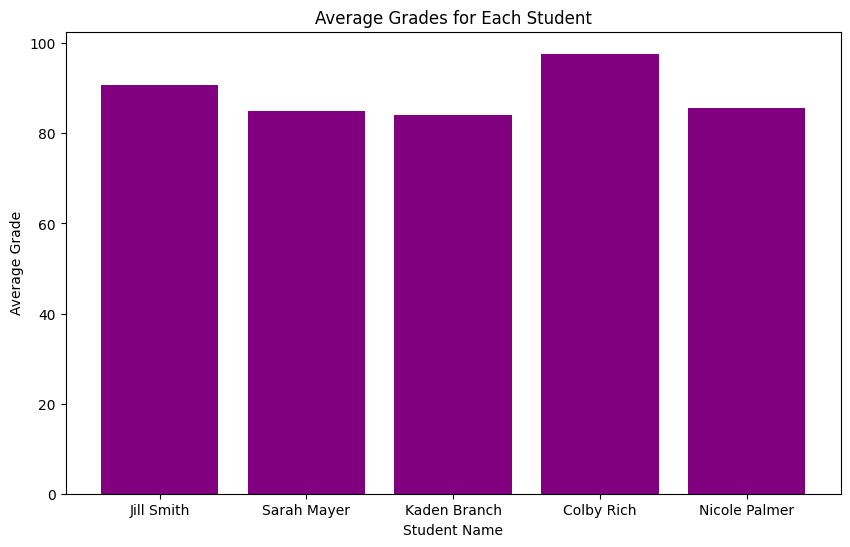

In [25]:
average = '''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id, students.first_name, students.last_name
'''
average_grades_df = pd.read_sql_query(average, connection)

plt.figure(figsize=(10, 6))
plt.bar(average_grades_df['first_name'] + ' ' + average_grades_df['last_name'], average_grades_df['average_grade'], color='purple')
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.show()

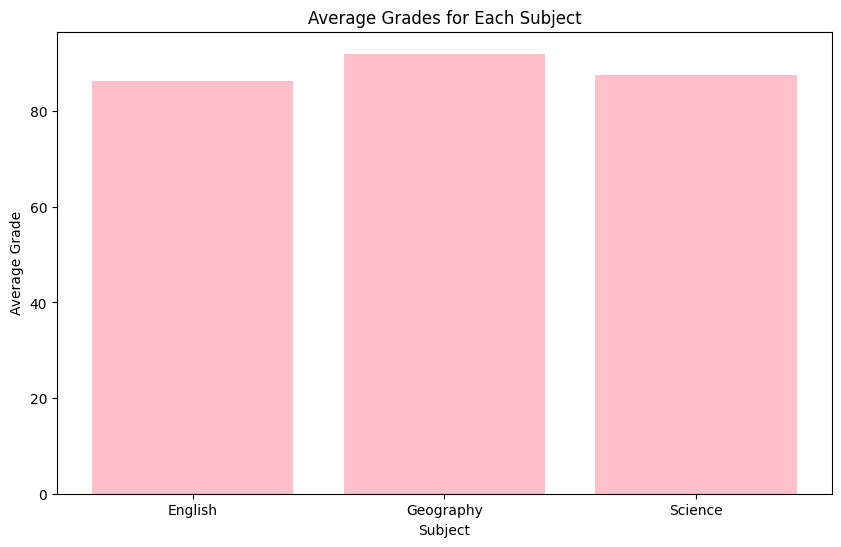

In [27]:
average_subject = '''
SELECT subject, AVG(grade) AS average_grade
FROM grades
GROUP BY subject
'''
average_subject_df = pd.read_sql_query(average_subject, connection)

plt.figure(figsize=(10, 6))
plt.bar(average_subject_df['subject'], average_subject_df['average_grade'], color='pink')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Subject')
plt.show()

In [37]:
# For the bonus task, I have no idea how to do the grouped bar chart but hoping for partial credit for the first question :)
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade =(
    SELECT MAX(grades_inner.grade)
    FROM grades grades_inner
    WHERE grades_inner.subject = grades.subject
)
''')
highest_subject = cursor.fetchall()
for row in highest_subject:
    print(f"{row[0]} {row[1]}, {row[2]}, {row[3]}")



Jill Smith, Geography, 100
Colby Rich, Science, 99
Colby Rich, English, 96
